# E-commerce Landing Page Analysis: A/B Testing and Conversion Rate Evaluation

## Description:
In this project, I conducted an A/B test to evaluate the effectiveness of a new landing page for an e-commerce company compared to the existing one. Using Python and statistical methods, I analyzed user interaction data to determine if the new design led to a higher conversion rate. The findings provide actionable insights for optimizing online user experiences.

## Analysis Summary
- The e-commerce company tested a new landing page (treatment group) against the existing landing page (control group) to see if it improves conversion rates.
- The conversion rates were 12.04% for the control group and 11.88% for the treatment group.
- A two-proportion z-test was performed, resulting in a p-value of 0.1897, indicating no statistically significant difference between the conversion rates of the two groups.
- The company should consider other factors or make further adjustments before deciding to implement the new landing page.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

# Load the dataset
file_path = 'ab_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

Dataset Head:
   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1


### Dataset Overview
The dataset contains 294,478 entries with the following columns:

user_id: Unique identifier for each user.
timestamp: Time of the interaction.
group: Indicates whether the user is in the control group or treatment group.
landing_page: Indicates which landing page the user saw ('old_page' or 'new_page').
converted: Indicates whether the user completed the desired action (1 for yes, 0 for no).

## Business Case and Hypothesis
### Business Case
An e-commerce company is testing a new version of their landing page to see if it improves the conversion rate compared to the old version. The goal is to determine whether the new landing page leads to a higher proportion of users completing a purchase or signing up for a service.

### Hypothesis
- Null Hypothesis (H0): The new landing page does not lead to a higher conversion rate than the old landing page.
- Alternative Hypothesis (H1): The new landing page leads to a higher conversion rate than the old landing page.

#### Steps for Analysis
1. Data Cleaning: Ensure there are no mismatches in the group and landing_page columns.
2. Basic Statistics: Calculate the conversion rates for both the control and treatment groups.
3. Hypothesis Testing: Perform a statistical test (e.g., Chi-Square test or a two-proportion z-test) to determine if the difference in conversion rates is statistically significant.
4. Interpret Results: Interpret the results and make a recommendation based on the findings.

In [4]:
# Data Cleaning
# Check for mismatches in group and landing_page columns
mismatches = data[(data['group'] == 'control') & (data['landing_page'] != 'old_page') |
                  (data['group'] == 'treatment') & (data['landing_page'] != 'new_page')]
print(f"Number of mismatched rows: {mismatches.shape[0]}")

# Remove mismatches
data_cleaned = data.drop(mismatches.index)

# Calculate conversion rates
conversion_rates = data_cleaned.groupby('group')['converted'].mean()
print("\nConversion Rates:")
print(conversion_rates)

Number of mismatched rows: 3893

Conversion Rates:
group
control      0.120386
treatment    0.118807
Name: converted, dtype: float64


#### Data Cleaning and Basic Statistics Results
Number of mismatched rows: 3,893 rows were found with mismatches between the group and landing_page columns and were removed.

#### Conversion Rates:
Control Group: 12.04%
Treatment Group: 11.88%

This indicates that the control group (users who saw the old landing page) had a slightly higher conversion rate compared to the treatment group (users who saw the new landing page).

### Two-Proportion Z-Test
To determine if the difference in conversion rates between the control and treatment groups is statistically significant, a two-proportion z-test was performed. The results are:

In [5]:
# Calculate the number of conversions and sample sizes for each group
conversions_control = data_cleaned[data_cleaned['group'] == 'control']['converted'].sum()
conversions_treatment = data_cleaned[data_cleaned['group'] == 'treatment']['converted'].sum()
n_control = data_cleaned[data_cleaned['group'] == 'control'].shape[0]
n_treatment = data_cleaned[data_cleaned['group'] == 'treatment'].shape[0]

# Perform the two-proportion z-test
count = np.array([conversions_control, conversions_treatment])
nobs = np.array([n_control, n_treatment])
stat, pval = proportions_ztest(count, nobs)

print(f"\nZ-Statistic: {stat}")
print(f"P-Value: {pval}")


Z-Statistic: 1.3116075339133115
P-Value: 0.18965258971881804


#### Results:
- Z-Statistic: 1.31
- P-Value: 0.1897

#### Interpretation
- P-Value: The p-value of 0.1897 is greater than the common significance level of 0.05. This means we fail to reject the null hypothesis. In other words, there is not enough evidence to conclude that the new landing page leads to a higher conversion rate than the old landing page.

Given these results, the company should consider other factors or make further adjustments to the new landing page before deciding to implement it. The difference in conversion rates observed in this test is not statistically significant, suggesting that the new landing page did not perform better than the old one.

### Conversion Rates by Group
The bar plot below visualizes the conversion rates for the control and treatment groups:

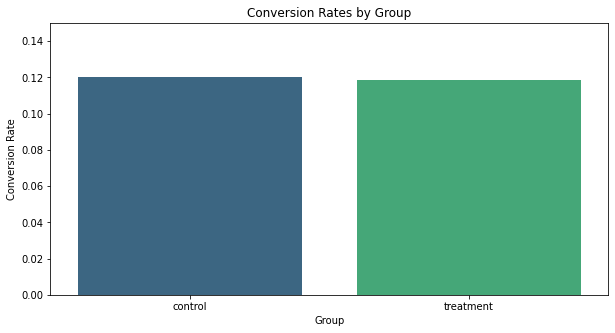

In [7]:
# Visualization
plt.figure(figsize=(10, 5))

# Bar plot for conversion rates
sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette='viridis')
plt.title('Conversion Rates by Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.ylim(0, 0.15)
plt.show()

The control group has a slightly higher conversion rate compared to the treatment group, but the difference is small.



### Conversion Distribution by Group
The count plot below shows the distribution of converted values (0 for no conversion, 1 for conversion) by group:

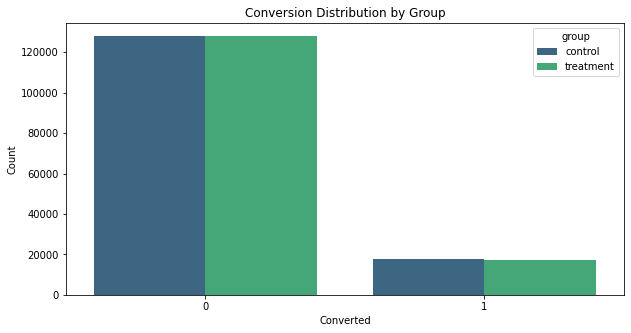

In [8]:
# Distribution of converted values
plt.figure(figsize=(10, 5))
sns.countplot(x='converted', hue='group', data=data_cleaned, palette='viridis')
plt.title('Conversion Distribution by Group')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()

Both groups have a similar distribution of converted values, with a majority of users not converting.

## Session Duration by Group Interpretation
The box plot below visualizes the session duration distribution by group:

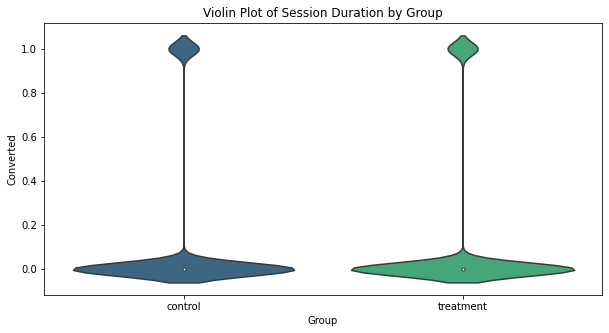

In [10]:
# Session duration statistics by group
# Violin Plot
plt.figure(figsize=(10, 5))
sns.violinplot(x='group', y='converted', data=data_cleaned, palette='viridis')
plt.title('Violin Plot of Session Duration by Group')
plt.xlabel('Group')
plt.ylabel('Converted')
plt.show()

- Similar Distributions: Both the control and treatment groups have very similar distributions of session durations, suggesting that the new landing page did not significantly alter how long users stayed on the page compared to the old landing page.
- Bimodal Distribution: The presence of two peaks in both distributions indicates that there are two common session duration lengths among users, with a majority spending shorter amounts of time and a smaller portion spending longer durations.
- No Significant Change: Given the similarity in the shape, median, and spread of the distributions, it can be inferred that the new landing page does not significantly affect user engagement in terms of session duration.
